# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


In [5]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


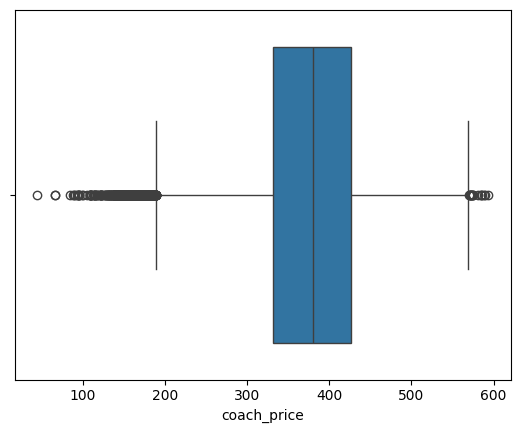

<Figure size 640x480 with 0 Axes>

In [6]:
# boxplot
sns.boxplot(x='coach_price', data=flight)
plt.show()
plt.clf()

In [7]:
print(np.min(flight.coach_price))

44.415


In [8]:
print(np.max(flight.coach_price))

593.635


In [9]:
print(np.mean(flight.coach_price))

376.58525308213905


In [10]:
print(np.median(flight.coach_price))

380.56


We conclude from the boxplot that the most coach prices fall within a range of 325 - 425 dollars. The cheapest ticket is almost 45 dol. and the most expensive is 594 dol. The average price is almost 380 dol. So the price of 500 dol. is quite expensive.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

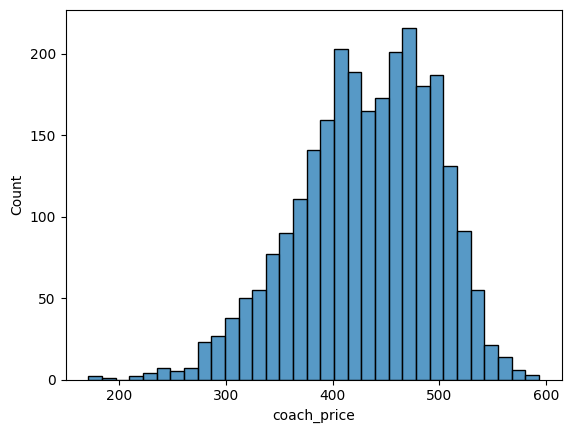

<Figure size 640x480 with 0 Axes>

In [11]:
## Task 2
sns.histplot(flight.coach_price[flight.hours == 8])
plt.show()
plt.clf()


In [12]:
print(np.min(flight.coach_price[flight.hours == 8]))

170.77


In [13]:
print(np.max(flight.coach_price[flight.hours == 8]))

593.635


In [14]:
print(np.mean(flight.coach_price[flight.hours == 8]))

431.834377372817


In [15]:
print(np.median(flight.coach_price[flight.hours == 8]))

437.115


The lowest coach price for an 8-hour-long flight is 170 dol., the highest is 594 dol. and an average price is around 437 dol. In this case a coach price of 500 dol. is more reasonable.

So, we can conclude that coach price depends on the flight hours.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

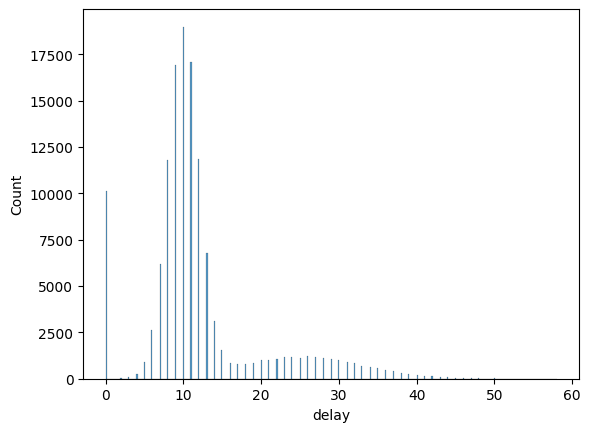

<Figure size 640x480 with 0 Axes>

In [16]:
## Task 3
# Create a histogram of flight delays with a maximum delay of 400 minutes
sns.histplot(flight.delay[flight.delay <= 400])  # Filter flights with delays less than or equal to 400 minutes


# Show the plot
plt.show()

# Clear the current figure to prepare for a new plot
plt.clf()



In [17]:
print(np.min(flight.delay[flight.delay <= 400]))

0


In [18]:
print(np.max(flight.delay[flight.delay <= 400]))

58


In [19]:
print(np.mean(flight.delay[flight.delay <= 400]))

12.018530228254164


In [20]:
print(np.median(flight.delay[flight.delay <= 400]))

10.0


We conclude that the minimum delay is 0 minutes and the maximum is almost 1 hour. An average delay that is capable to put the client at risk of missing a connecting flight is 10 min. Most delays for this airline are about 8-12 minutes.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

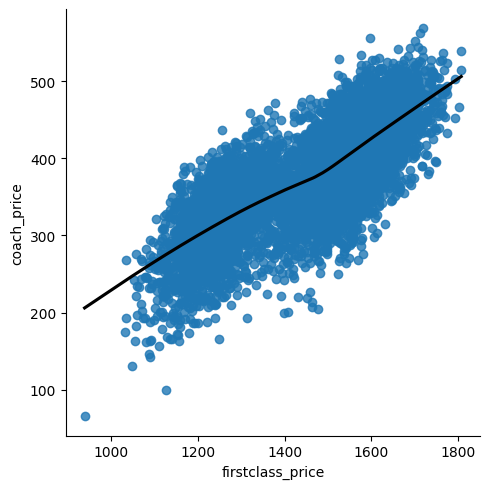

<Figure size 640x480 with 0 Axes>

In [21]:
## Task 4
# Define the percentage of data you want to sample
perc = 0.05

# Sample a subset of the flights data based on the defined percentage
flights_costs = flight.sample(n=int(flight.shape[0]*perc))

# Create a scatter plot with a regression line showing the relationship between first-class and coach prices
# using Seaborn's lmplot function
sns.lmplot(x='firstclass_price', y='coach_price', data=flights_costs, line_kws={'color':'black'}, lowess=True)

# Display the plot
plt.show()

# Clear the current figure to prepare for a new plot
plt.clf()



These two values have strong positive linear relationship. We can notice that as increases the price of first class ticket, icreases and the coach price too.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

<ipython-input-30-924b0dd4df66>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='inflight_meal', y='coach_price', data=flight, palette='Accent')
<ipython-input-30-924b0dd4df66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, palette='Accent')
<ipython-input-30-924b0dd4df66>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, palette='Accent')


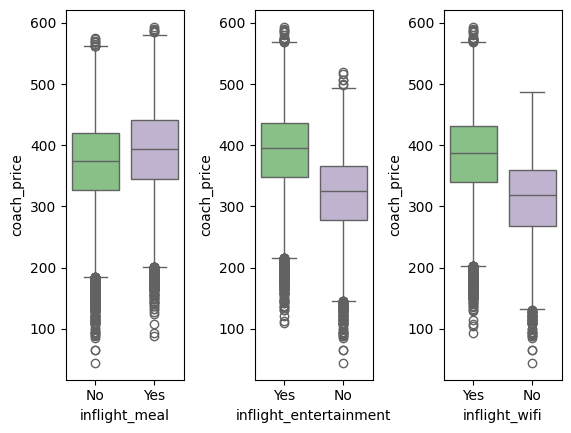

<Figure size 640x480 with 0 Axes>

In [30]:
## Task 5
# Create the first subplot
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
sns.boxplot(x='inflight_meal', y='coach_price', data=flight, palette='Accent')

# Create the second subplot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, position 2
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, palette='Accent')

# Create the third subplot
plt.subplot(1, 3, 3)  # 1 row, 3 columns, position 3
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, palette='Accent')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Display the plot
plt.show()

# Clear the current figure to prepare for a new plot
plt.clf()



We have noticed that flights with meals, entertainment, and wifi included are priced around $400 for coach class.

6. How does the number of passengers change in relation to the length of flights?

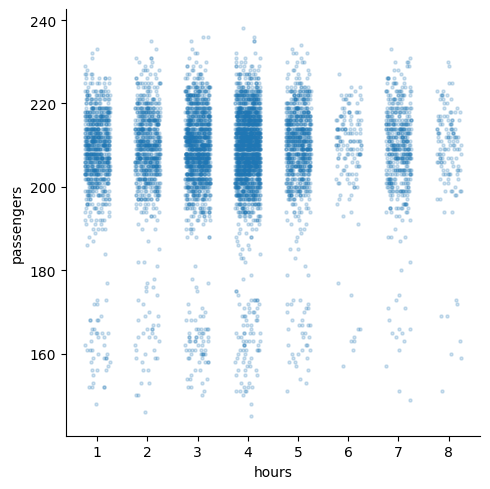

<Figure size 640x480 with 0 Axes>

In [34]:
## Task 6

# Create a scatter plot of hours vs. passengers
sns.lmplot(
    x="hours",                            # Variable to be plotted on the x-axis
    y="passengers",                       # Variable to be plotted on the y-axis
    data=flights_costs,                   # Dataset to be used for plotting
    x_jitter=0.25,                        # Amount of jitter (random noise) to be added to x-axis values
    scatter_kws={"s": 5, "alpha": 0.2},   # Additional keyword arguments for scatter plot aesthetics
    fit_reg=False                         # Disable fitting a regression line to the data
)

# Show the plot
plt.show()

# Clear the current figure to prepare for a new plot
plt.clf()



We notice that that there are significantly fewer data points (passengers) at 6 and 8 hours compared to the other hours.

Also there is a break in the distribution of passengers around 180 (very few flights have around 180 passengers).

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

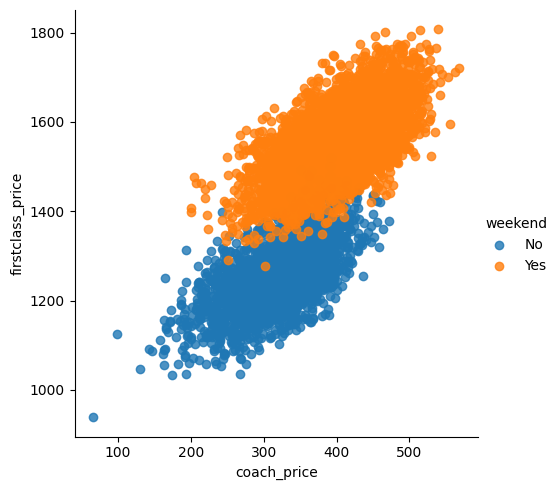

<Figure size 640x480 with 0 Axes>

In [37]:
## Task 7
# Create a scatter plot with hue based on the 'weekend' variable
sns.lmplot(
    x='coach_price',                   # Variable to be plotted on the x-axis
    y='firstclass_price',              # Variable to be plotted on the y-axis
    hue='weekend',                     # Variable used to color the points based on weekends
    data=flights_costs,                # Dataset to be used for plotting
    fit_reg=False                      # Disable fitting a regression line to the data
)

# Show the plot
plt.show()

# Clear the current figure to prepare for a new plot
plt.clf()




The scatterplot chart does not distinguish between flights that occur during weekdays and weekends. Additionally, purchasing a first-class ticket on weekdays is more economical compared to the weekends. As the cost of coach tickets increases, so does the price of first-class tickets, indicating a strong positive linear relationship between these two variables.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

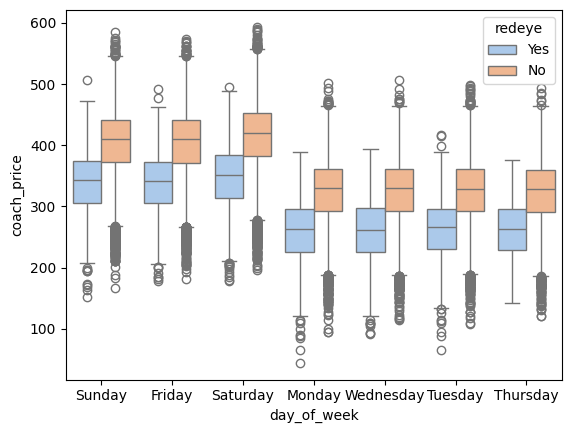

In [38]:
## Task 8
# Create a box plot with hue based on the 'redeye' variable
sns.boxplot(
    x='day_of_week',           # Variable to be plotted on the x-axis (days of the week)
    y='coach_price',           # Variable to be plotted on the y-axis (coach prices)
    hue='redeye',              # Variable used to color the boxes based on 'redeye' flights
    palette='pastel',          # Color palette for the plot
    data=flight                # Dataset to be used for plotting
)

# Show the plot
plt.show()



There is no difference in coach price for overnight flights between Monday-Thursday. In general, daily flights are more expensive than overnight flights. Additionally, coach prices are more expensive on weekends (Friday-Sunday) than other days of the week.